Introduction

In this project, we will examine the data and build different machine learning models that will predict the right sales channel to generate good revenue


Dataset

The dataset used in this project is advt.csv that contains 200 instances with 5 features like  TV, radio, newspaper, sales.

In [171]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [172]:
advt=pd.read_csv("advt.csv")

In [173]:
advt

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [174]:
advt.keys

<bound method NDFrame.keys of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [175]:
advt.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Removing column 'Unnamed: 0' as it is not contributing in dataset seems to be a repitition of serial number

In [176]:
advt.drop(['Unnamed: 0'], axis='columns', inplace=True) 


In [177]:
advt

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [178]:
advt.shape #checking shape of dataset

(200, 4)

In [179]:
advt.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [180]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Data type is Float

In [182]:
advt.isnull().sum() #Checking null values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [183]:
advt.dtypes #checking datatype

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Statistics Summery

In [184]:
advt.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Visualization of the data

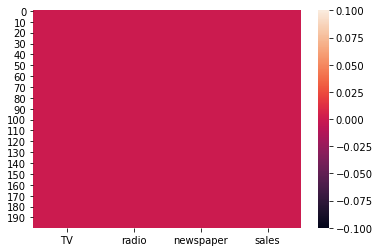

In [185]:
sns.heatmap(advt.isnull())

There is no null values in given data sets

CHECKING CORRELATION

In [186]:
adcor=advt.corr()
adcor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


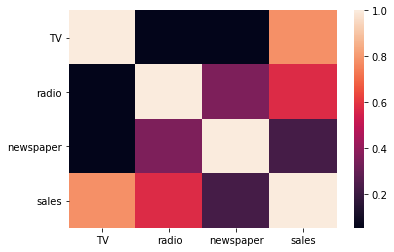

In [187]:
sns.heatmap(adcor)

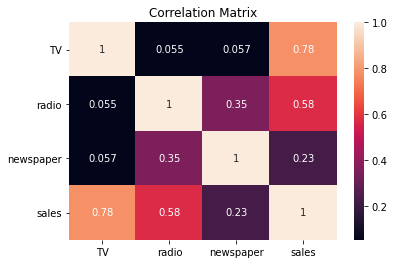

In [188]:
plt.figure(figsize=(6,4))
sns.heatmap(adcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

The graphs shows that TV advt. has the heighest correlation with sales

In [225]:
corr_matrix=advt.corr()

In [190]:
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

In [191]:
# spliting the independent and target variables in x and y
x=advt.drop("sales",axis=1)
y=advt["sales"]

In [192]:
# see that the target feature is discrete
print(set(advt['sales']))

{1.6, 3.2, 4.8, 5.6, 5.5, 7.2, 8.6, 9.3, 10.4, 11.3, 11.8, 12.9, 13.2, 10.6, 9.2, 9.7, 17.4, 18.5, 19.0, 12.5, 22.1, 22.4, 24.4, 18.0, 18.9, 21.4, 25.4, 21.5, 23.2, 22.6, 23.7, 24.2, 27.0, 26.2, 7.0, 8.5, 8.0, 9.5, 10.5, 11.0, 11.5, 12.0, 14.0, 14.5, 15.5, 15.0, 16.6, 16.0, 16.9, 16.1, 17.1, 17.0, 17.6, 18.4, 19.4, 19.6, 20.1, 25.5, 5.9, 6.9, 8.4, 9.4, 9.9, 10.9, 11.9, 11.4, 12.4, 13.4, 14.9, 14.4, 15.9, 5.3, 7.3, 8.8, 8.7, 10.7, 10.8, 10.3, 11.2, 11.7, 12.8, 12.3, 12.2, 12.7, 13.3, 14.7, 14.8, 14.2, 15.7, 15.2, 15.3, 16.7, 17.2, 17.3, 5.7, 18.3, 6.7, 19.2, 19.8, 19.7, 20.7, 20.2, 20.8, 21.2, 21.7, 21.8, 22.3, 22.2, 23.8, 24.7, 6.6, 7.6, 8.1, 9.6, 10.1, 11.6, 12.6, 13.6, 14.6, 14.1, 15.6}


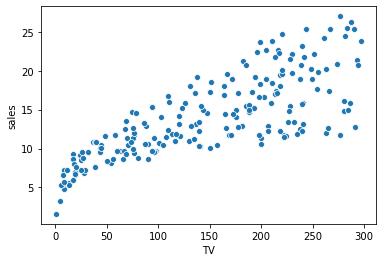

In [193]:
sns.scatterplot(x="TV",y="sales",data=advt)

TV advt has the positive corelation with sales

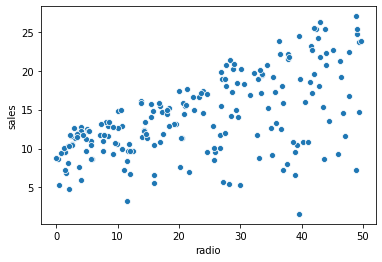

In [194]:
sns.scatterplot(x="radio",y="sales",data=advt)

Radio advt has the moderate corelation with sales

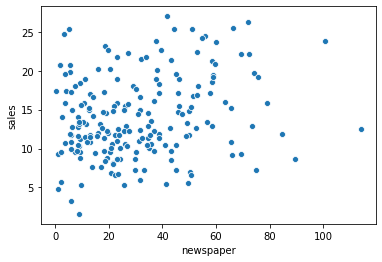

In [195]:
sns.scatterplot(x="newspaper",y="sales",data=advt)

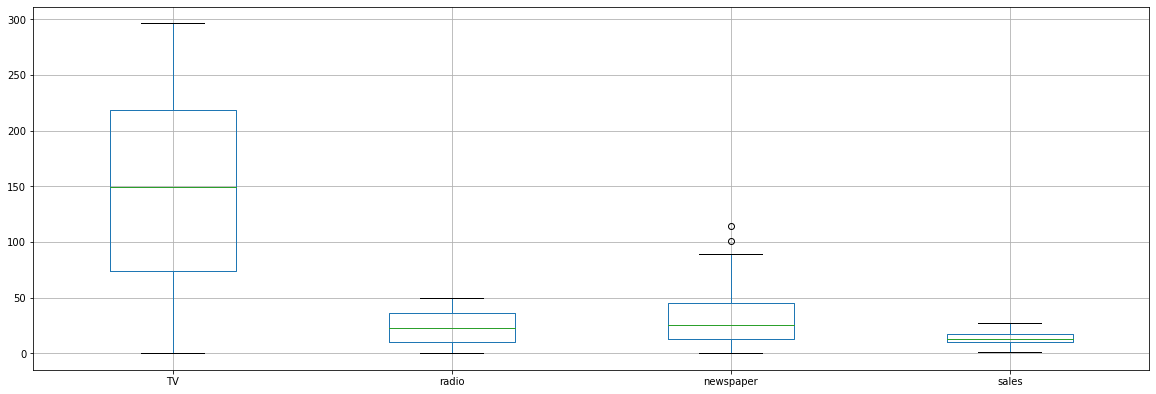

In [196]:
#Plotting boxplots to check outliers
advt.iloc[:,0:23].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
The number of outliers is very less so we will contnue with outliers

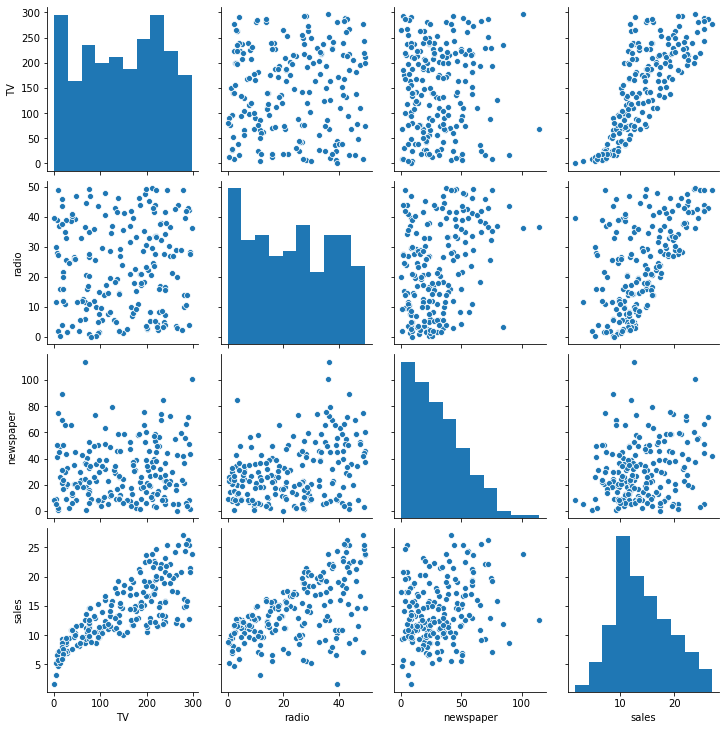

In [197]:
sns.pairplot(advt)
plt.show()

As per pair plot TV advt has the heighest correlation with sales

In [198]:
x.skew() #checking skewness

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [199]:
from sklearn.preprocessing import power_transform   #removing skewness
advt_new=power_transform(x)
advt_new=pd.DataFrame(advt_new,columns=x.columns)

In [200]:
advt_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [201]:
x=advt_new

In [202]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


Scalling,traning and testing the dataset

In [203]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [204]:
import warnings
warnings.filterwarnings('ignore')

In [205]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("best accuracy is ",maxAccu,"on Random_state",maxRS)


best accuracy is  0.9466739420024826 on Random_state 57


In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=57)

In [207]:
lr.fit(x_train,y_train)

LinearRegression()

In [208]:
predrf_test=lr.predict(x_test)

In [209]:
print(r2_score(y_test,predrf_test))

0.9466739420024826


In [210]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=57)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))


0.9865351279035649
Mean absolute error: 5.862473156011402
Mean squared error: 49.79258208515207
Root mean squared error: 7.056385908179347


In [211]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(r2_score(y_test,predrf))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9865351279035649
Mean absolute error: 5.862473156011402
Mean squared error: 49.79258208515207
Root mean squared error: 7.056385908179347


In [212]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9865351279035649

In [213]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
score=cross_val_score(rf, x,y,cv=5)
r2=r2_score(y_test,predrf)
r2

0.9865351279035649

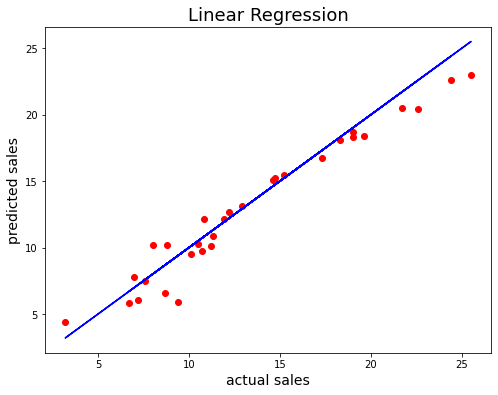

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrf_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual sales',fontsize=14)
plt.ylabel('predicted sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Best fit line is covering most of the datapoints which shows good fit of our model

Hper tuning the data set with cross validation and GridSearchCV

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [216]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
grid=GridSearchCV(ls,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [217]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
predrf_ls=ls.predict(x_test)
lss=r2_score(y_test,predrf_ls)
lss

0.8579691861858136

In [218]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8270960357806553

Ensemble technique:

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [220]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf_decision=rf.predict(x_test)
rfs=r2_score(y_test,predrf_decision)
print("R2 Score:",rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("corss val score:",rfc*100)

R2 Score: 98.80441300736244
corss val score: 97.4821262099455


In [222]:
import joblib
joblib.dump(rf,"advertisement.obj")

['advertisement.obj']

In [223]:
p=joblib.load("advertisement.obj")

In [224]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
advt_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
advt_com

,original,predicted
0,21.7,22.039
1,15.2,14.845
2,8.7,8.745
3,12.9,13.523
4,18.3,18.254
5,19.0,17.908
6,10.1,10.589
7,11.9,12.554
8,19.0,18.507
9,9.4,8.931
